In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle as pkl

In [2]:
plt.rcParams.update({'font.size': 15})

# Load Data

In [3]:
data_file_names = ['Plain','UnconstrainedDAP','ConstrainedDAP','Parameters',\
                   'UnconstrainedLearning_eta_0.1','SafeLearning_eta_0.1'\
                  ]

In [4]:
data = {}
for name in data_file_names:
    with open('./data/{}.pkl'.format(name),'rb') as f:
        data[name] = pkl.load(f)

In [5]:
AK = data['Parameters']['AK']
H_benchmark = data['Parameters']['H_benchmark']

In [6]:
 data['Parameters']

{'Q': array([[100,   0],
        [  0, 100]]),
 'R': array([[1.]]),
 'D_x': array([[ 1.,  0.],
        [ 0.,  1.],
        [-1., -0.],
        [-0., -1.]]),
 'd_x': array([5, 2, 1, 2]),
 'D_u': array([[ 1.],
        [-1.]]),
 'd_u': array([5. , 9.8]),
 'w_cov': array([[0.04, 0.  ],
        [0.  , 0.04]]),
 'alpha_limit': (0.5, 1.2),
 'beta_limit': (0.2, 0.4),
 'H': 6,
 'H_benchmark': 6,
 'eta_bars': [0.05, 0.1, 0.2, 0.5, 1.0],
 'A': array([[1.  , 1.  ],
        [0.  , 0.75]]),
 'AK': array([[ 1.        ,  1.        ],
        [-0.66666667, -0.25      ]]),
 'B': array([[0.],
        [1.]]),
 'A_hat_0': array([[1. , 1. ],
        [0. , 0.6]]),
 'B_hat_0': array([[0. ],
        [0.5]]),
 'r_0': 0.2,
 'w_max': 0.2,
 'K_stab': array([[0.66666667, 1.        ]]),
 'l': 0.25,
 'm': 1,
 'dt': 1,
 'random seed': 13}

# Plotting

## The plotting handler

In [7]:
def plot_with_errorband(ax,trial_data,label=''):
    mu = np.mean(trial_data,axis=0)
    std = np.std(trial_data,axis=0)

    indices = range(len(mu))

    ax.plot(np.array(mu),label=label)
    ax.fill_between(indices,mu+std,mu-std,alpha=0.2)

In [8]:
def plot_with_maxmin(ax,trial_data,label=''):
    max_x = np.max(trial_data,axis=0)
    min_x = np.min(trial_data,axis=0)
    median_x = np.median(trial_data,axis=0)

    indices = range(len(max_x))

    ax.plot(indices,median_x,label=label)
    
    ax.fill_between(indices,max_x,min_x,alpha=0.2)

## x,v,u vs time

## A figure showing unconstraint LQR violates actual constraints, either in x or in u.

In [9]:
x_max = data['Parameters']['d_x'][0]
x_min = -data['Parameters']['d_x'][2]

v_max = data['Parameters']['d_x'][1]
v_min = -data['Parameters']['d_x'][3]

u_max = data['Parameters']['d_u'][0]
u_min = -data['Parameters']['d_u'][1]

In [19]:
data['Parameters']

{'Q': array([[100,   0],
        [  0, 100]]),
 'R': array([[1.]]),
 'D_x': array([[ 1.,  0.],
        [ 0.,  1.],
        [-1., -0.],
        [-0., -1.]]),
 'd_x': array([5, 2, 1, 2]),
 'D_u': array([[ 1.],
        [-1.]]),
 'd_u': array([5. , 9.8]),
 'w_cov': array([[0.04, 0.  ],
        [0.  , 0.04]]),
 'alpha_limit': (0.5, 1.2),
 'beta_limit': (0.2, 0.4),
 'H': 6,
 'H_benchmark': 6,
 'eta_bars': [0.05, 0.1, 0.2, 0.5, 1.0],
 'A': array([[1.  , 1.  ],
        [0.  , 0.75]]),
 'AK': array([[ 1.        ,  1.        ],
        [-0.66666667, -0.25      ]]),
 'B': array([[0.],
        [1.]]),
 'A_hat_0': array([[1. , 1. ],
        [0. , 0.6]]),
 'B_hat_0': array([[0. ],
        [0.5]]),
 'r_0': 0.2,
 'w_max': 0.2,
 'K_stab': array([[0.66666667, 1.        ]]),
 'l': 0.25,
 'm': 1,
 'dt': 1,
 'random seed': 13}

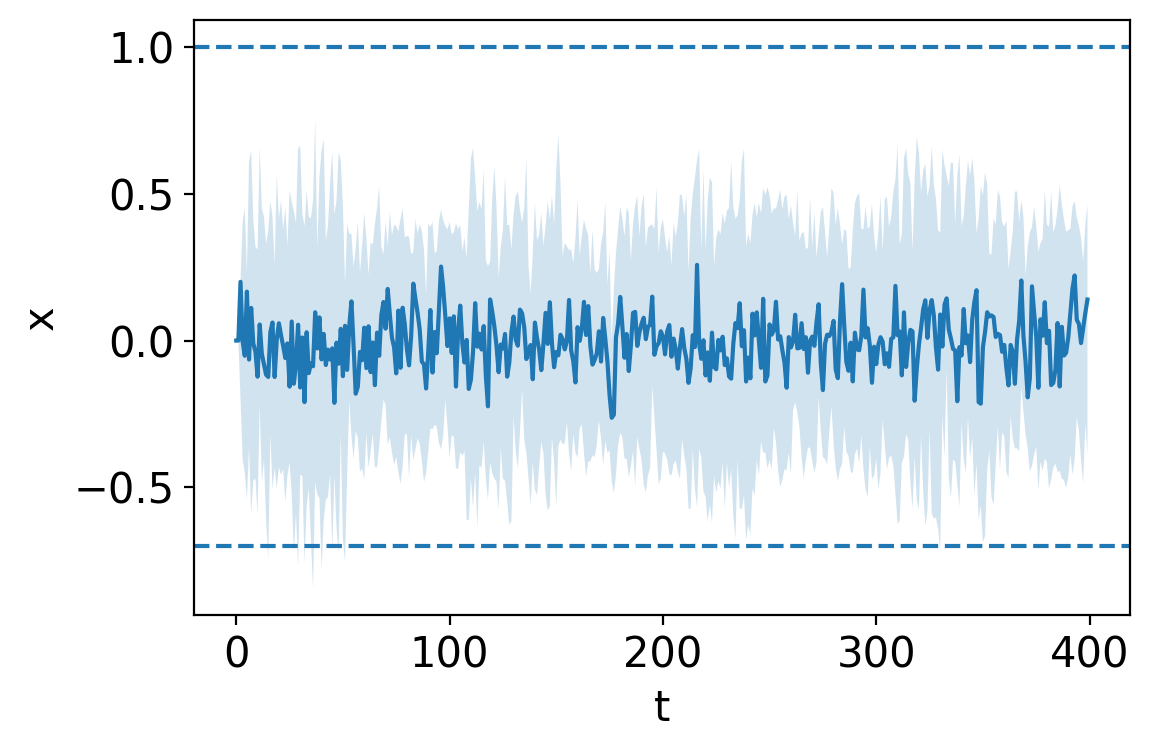

In [13]:
alg_names =  [
#                 'Plain',\
#               'UnconstrainedDAP',\
#               'ConstrainedDAP',\
#               'UnconstrainedLearning_eta_0.01',
    'SafeLearning_eta_0.1'\
             ]
# alg_names =  ['UnconstrainedLearning_eta_0.1','SafeLearning_eta_0.1']




colors =  ['black','blue','red','green','orange']

color_map = {alg:c for (alg,c) in zip(alg_names,colors)}

# control_alg =  ['ConstrainedDAP','SafeLearning_eta_0.1']

for name in alg_names:
    
    plt.figure(dpi=200)

    ax = plt.gca()
    x_hist = np.array([d['x'] for d in data[name]])[:,:,0,0]
    plot_with_maxmin(ax,x_hist,label = name)


    ax.axhline(1,ls='dashed')
    ax.axhline(-0.7,ls='dashed')

    # ax.set_title(name)

    ax.set_xlabel('t')
    ax.set_ylabel('x')

#     ax.legend()


    plt.tight_layout()
#     plt.show()
    plt.savefig('./figures/x.png')


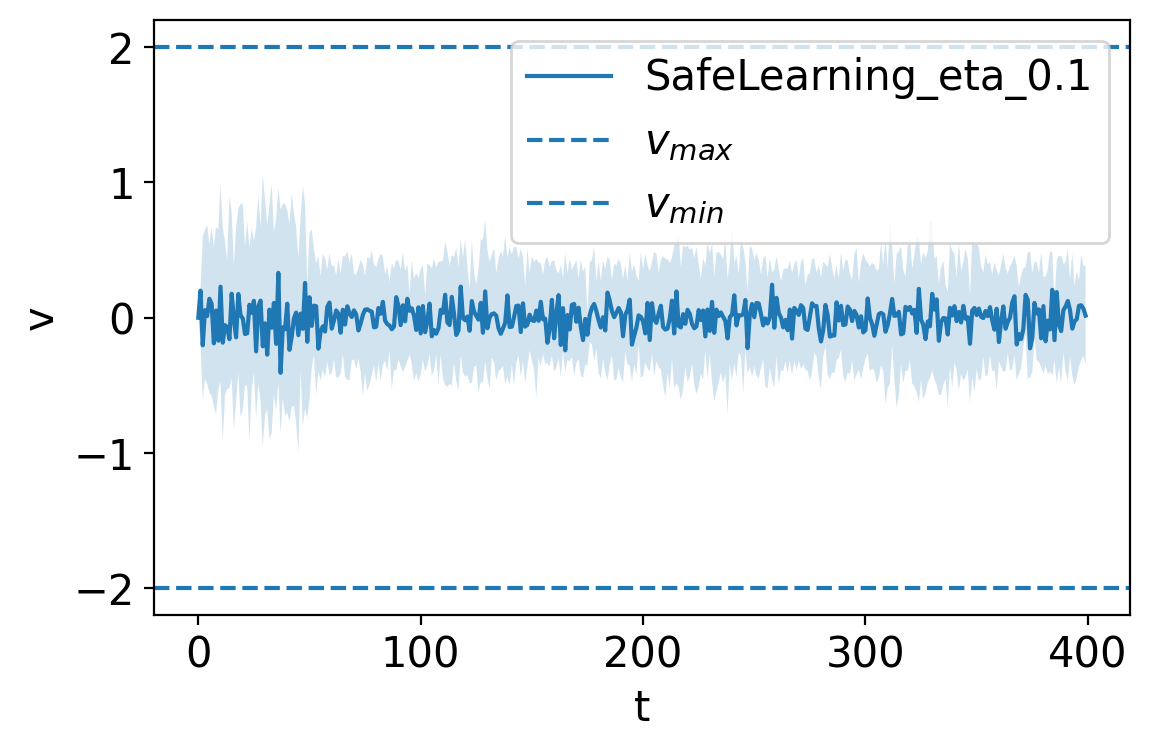

In [11]:

for name in alg_names:

    plt.figure(dpi=200)
    ax = plt.gca()    
   
    v_hist = np.array([d['x'] for d in data[name]])[:,:,1,0]     
    plot_with_maxmin(ax,v_hist,label = name)

    ax.axhline(v_max,label=r'$v_{max}$',ls='dashed')
    ax.axhline(v_min,label=r'$v_{min}$',ls='dashed')

    ax.set_xlabel('t')
    ax.set_ylabel('v')
    ax.legend()


    plt.tight_layout()
# plt.savefig('./figures/v.png')


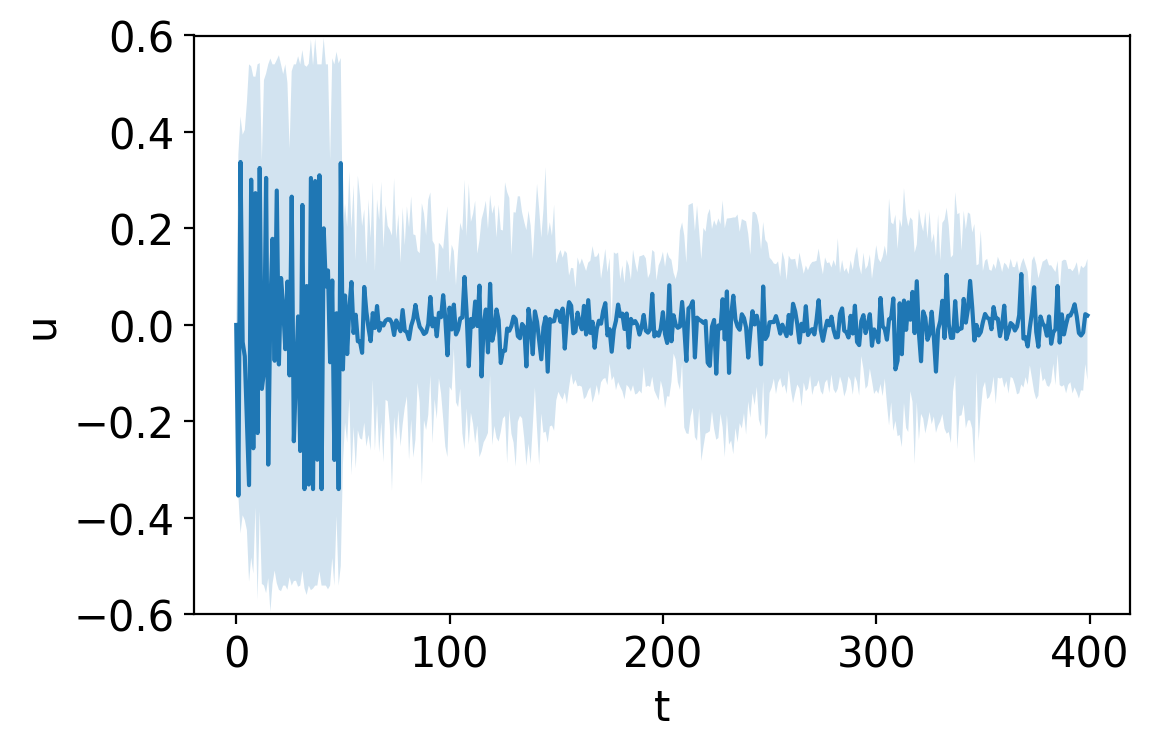

In [18]:
# control_alg = ['SafeLearning','UnconstrainedLearning']
control_alg = [
#                 'UnconstrainedDAP',
#     'ConstrainedDAP',\
               'SafeLearning_eta_0.1'\
              ]

for name in control_alg:
    
    plt.figure(dpi=200)
    ax = plt.gca()
    v_hist = np.array([d['u'] for d in data[name]])  
    plot_with_maxmin(ax,v_hist,label = name)



#     ax.axhline(-0.5,label=r'$u_{max}$',ls='dashed')
#     ax.axhline(0.5,label=r'$u_{min}$',ls='dashed')
    ax.set_ylim((-0.6,0.6))

    ax.set_xlabel('t')
    ax.set_ylabel('u')
#     ax.legend()

    plt.tight_layout()
# plt.savefig('./figures/u.png')


In [21]:
Sample_M = data['SafeLearning_eta_0.1'][0]['M']

for i in range(len(Sample_M)):
    print('t=',i*50)
    print('M_t=',Sample_M[i])

t= 0
M_t= [[[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]]
t= 50
M_t= [[[-8.91903978e-01 -1.76799737e+00]]

 [[ 3.81094376e-01  3.91463773e-01]]

 [[ 1.91286054e-01  1.87201140e-01]]

 [[ 3.89410141e-12  1.93249527e-11]]

 [[-2.22140740e-01 -1.53780000e-01]]

 [[ 1.42052570e-01  7.47779996e-02]]]
t= 100
M_t= [[[-4.40862042e-01 -9.01294331e-01]]

 [[ 2.75100442e-01  2.70302336e-01]]

 [[ 7.86486524e-02  8.06245865e-02]]

 [[-1.21015785e-11 -2.07680567e-11]]

 [[-8.47173792e-02 -1.37952396e-01]]

 [[ 4.76505036e-02  7.12136903e-02]]]
t= 150
M_t= [[[-0.2236451  -0.68400475]]

 [[ 0.18668873  0.18382564]]

 [[ 0.07299981  0.07330505]]

 [[ 0.03361854  0.03431703]]

 [[-0.06073393 -0.08099471]]

 [[ 0.03565763  0.04455018]]]
t= 200
M_t= [[[-0.17268672 -0.59219008]]

 [[ 0.17922737  0.17697605]]

 [[ 0.06384916  0.06413544]]

 [[ 0.03261745  0.03317417]]

 [[-0.04846192 -0.06908983]]

 [[ 0.03284295  0.04377528]]]
t= 250
M_t= [[[-0.11336542 -0.53290098]]

 [[ 0.2102356